### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.shape

(730, 16)

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# We have no column with null or NA values and all data types are correct

In [8]:
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [10]:
data.mnth = data.mnth.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})

In [11]:
data.weekday = data.weekday.map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THUR',5:'FRI',6:'SAT'})

In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,JAN,0,SAT,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,JAN,0,SUN,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,JAN,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,JAN,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,JAN,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Preparation

In [13]:
season_status = pd.get_dummies(data['season'], drop_first = True)
data = pd.concat([data, season_status], axis = 1)

In [14]:
month = pd.get_dummies(data['mnth'], drop_first = True)
data = pd.concat([data, month], axis = 1)

In [15]:
weekday_status = pd.get_dummies(data['weekday'], drop_first = True)
data = pd.concat([data, weekday_status], axis = 1)

In [16]:
weathersit_status = pd.get_dummies(data['weathersit'], drop_first = True)
data = pd.concat([data, weathersit_status], axis = 1)

In [17]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,Light_snowrain,Misty
0,1,01-01-2018,spring,0,JAN,0,SAT,0,Misty,14.110847,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,spring,0,JAN,0,SUN,0,Misty,14.902598,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,spring,0,JAN,0,MON,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,JAN,0,TUE,1,Clear,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,spring,0,JAN,0,WED,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# As instant column does not provide any value, we can drop it
data.drop(columns=['instant','dteday','season','mnth','weekday','weathersit','casual','registered'],inplace=True)

In [19]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'AUG', 'DEC', 'FEB', 'JAN', 'JULY',
       'JUNE', 'MAR', 'MAY', 'NOV', 'OCT', 'SEP', 'MON', 'SAT', 'SUN', 'THUR',
       'TUE', 'WED', 'Light_snowrain', 'Misty'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [21]:
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
print(df_test.shape)
print(df_train.shape)

(219, 30)
(510, 30)


### Rescaling the Features 


In [23]:
scaler = MinMaxScaler()

In [24]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model


In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('AUG', False, 13),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JULY', True, 1),
 ('JUNE', False, 5),
 ('MAR', False, 9),
 ('MAY', False, 15),
 ('NOV', False, 2),
 ('OCT', False, 11),
 ('SEP', True, 1),
 ('MON', False, 14),
 ('SAT', True, 1),
 ('SUN', False, 7),
 ('THUR', False, 12),
 ('TUE', False, 8),
 ('WED', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'JAN', 'JULY', 'SEP', 'SAT', 'Light_snowrain',
       'Misty'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [30]:
X_train_rfe = X_train[col]

In [31]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          2.31e-191
Time:                        15:19:35   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

In [32]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [33]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Misty,2.29
0,yr,2.09
12,SAT,1.98


In [36]:
# Removing hum and rebuilding model
X_train_rfe = X_train_rfe.drop('hum', 1,)

In [37]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          7.33e-189
Time:                        15:21:37   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [38]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,SAT,1.97
8,JAN,1.62
9,JULY,1.59


In [39]:
# Removing temp
X_train_rfe = X_train_rfe.drop('temp', 1,)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          4.04e-154
Time:                        15:23:23   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5448      0.020     27.

In [40]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,SAT,1.69
7,JAN,1.60
12,Misty,1.56
8,JULY,1.30


In [41]:
# Removing holiday
X_train_rfe = X_train_rfe.drop('holiday', 1,)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          1.54e-154
Time:                        15:24:35   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5368      0.020     27.

In [42]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,spring,2.92
4,summer,2.25
5,winter,1.92
0,yr,1.91
9,SAT,1.62
6,JAN,1.60
11,Misty,1.56
7,JULY,1.29


In [43]:
# Removing JULY
X_train_rfe = X_train_rfe.drop('JULY', 1,)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Thu, 07 Jul 2022   Prob (F-statistic):          1.30e-155
Time:                        15:25:25   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5334      0.018     30.

In [44]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,JAN,1.60
8,SAT,1.56
10,Misty,1.56
7,SEP,1.18


## Residual Analysis of the train data


In [50]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

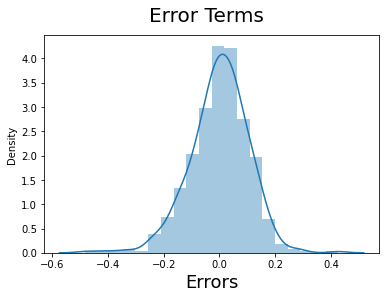

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [52]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [55]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation
